# MLP for Fashion MNIST Classification
This notebook demonstrates how to build a simple Multi-Layer Perceptron (MLP) using Keras with a TensorFlow backend to classify images from the Fashion MNIST dataset. This dataset contains 70,000 grayscale images of 10 different clothing categories.

## 1. Importing Libraries
We'll start by importing the necessary libraries. We need TensorFlow and its high-level API Keras for building the neural network, NumPy for numerical operations, and Matplotlib for plotting and visualizing the data.

In [1]:
# TensorFlow is the core open-source machine learning platform.
import tensorflow as tf

# Keras is a high-level API within TensorFlow for building and training models easily.
from tensorflow import keras

# NumPy is a fundamental package for numerical computation in Python.
import numpy as np

# The OS module is used for interacting with the operating system.
import os

# Matplotlib is a library for creating static, animated, and interactive visualizations.
import matplotlib as mpl
import matplotlib.pyplot as plt

## 2. Loading the Dataset
The Fashion MNIST dataset is conveniently included in `keras.datasets`. We can load it directly. It's already split into a training set (60,000 images) and a test set (10,000 images).

In [2]:
# Load the Fashion MNIST dataset from Keras.
fashion_mnist = keras.datasets.fashion_mnist

# The load_data() function returns two tuples: one for training and one for testing.
# X_train_full/X_test contain the image pixel data (features).
# y_train_full/y_test contain the corresponding labels (the category of clothing).
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

## 3. Data Exploration and Preprocessing
Let's explore the dataset's structure, create a validation set, and normalize the pixel values to improve training performance.

In [3]:
# Print the shape of the datasets to understand their dimensions.
# X_train_full: 60,000 images, each 28x28 pixels.
print(X_train_full.shape)

# y_train_full: 60,000 labels for the training images.
print(y_train_full.shape)

# X_test: 10,000 images for testing.
print(X_test.shape)

# y_test: 10,000 labels for the test images.
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Check the data type of the pixel values.
# 'uint8' means they are 8-bit unsigned integers, ranging from 0 to 255.
X_train_full.dtype

dtype('uint8')

### Splitting and Normalizing the Data
We will split the full training set into a validation set and a (smaller) training set. The validation set is used during training to estimate the model's performance on data it hasn't seen before, helping to detect overfitting.

We also **normalize** the pixel values by dividing by 255.0. This scales the data to a range of [0, 1], which generally helps neural networks train faster and more effectively.

In [5]:
# Create a validation set from the first 5000 images of the training data.
# Also, scale the pixel intensities to the [0, 1] range by dividing by 255.0.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalize the test set as well.
X_test = X_test / 255.

## 4. Data Visualization
Let's visualize some of the images to get a feel for the data we're working with.

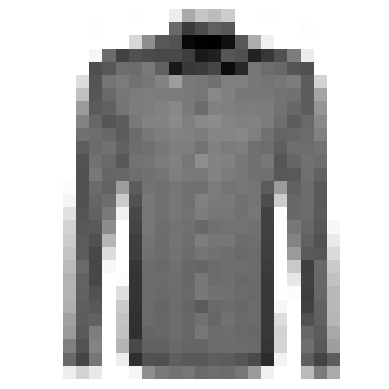

In [6]:
# Display a single image from the training set using Matplotlib.
# cmap="binary" shows it in grayscale.
plt.imshow(X_train[15], cmap="binary")
plt.axis('off') # Hide the axes.
plt.show()

In [7]:
# The labels are integers from 0 to 9.
y_train[65]

np.uint8(5)

In [8]:
# Create a list of human-readable class names to map the integer labels.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# Example: Find the class name for the 14th training image's label.
class_names[y_train[13]]

'Shirt'

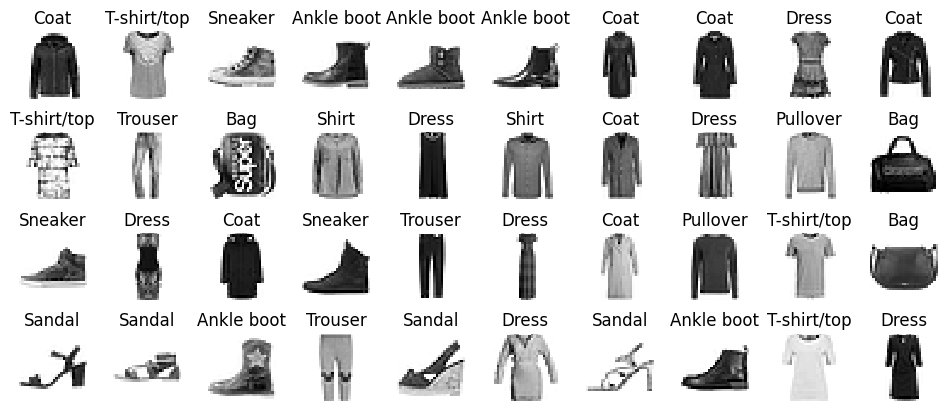

In [10]:
# Set up the figure for plotting multiple images.
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Loop to display the first 40 images from the training set.
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

# Adjust spacing between plots.
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 5. Building the Model
Now, we'll create a `Sequential` model. This is a simple feed-forward network, which is a good starting point for image classification.
- **Flatten Layer**: This layer converts each 28x28 image into a 1D array of 784 pixels.
- **Dense Layers**: These are fully-connected layers. We use two hidden layers with the 'ReLU' activation function.
- **Output Layer**: This is a final Dense layer with 10 neurons (one for each class) and a 'softmax' activation function, which outputs a probability for each class.

In [11]:
# Create a Sequential model, which is a linear stack of layers.
model = keras.models.Sequential([
    # The first layer flattens the input image (28x28) into a 1D vector (784).
    keras.layers.Flatten(input_shape=[28, 28]),
    # The first hidden layer with 256 neurons and ReLU activation.
    keras.layers.Dense(256, activation="relu"),
    # The second hidden layer with 128 neurons and ReLU activation.
    keras.layers.Dense(128, activation="relu"),
    # The output layer with 10 neurons (for 10 classes) and softmax activation.
    # Softmax ensures the output is a probability distribution (all outputs sum to 1).
    keras.layers.Dense(10, activation="softmax")
])

d:\Program Files\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Print a summary of the model's architecture.
# This shows each layer, its output shape, and the number of trainable parameters.
# Param # for dense_3: (784 inputs * 256 neurons) + 256 biases = 200,960
# Param # for dense_4: (256 inputs * 128 neurons) + 128 biases = 32,896
# Param # for dense_5: (128 inputs * 10 neurons)   + 10 biases   = 1,290
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

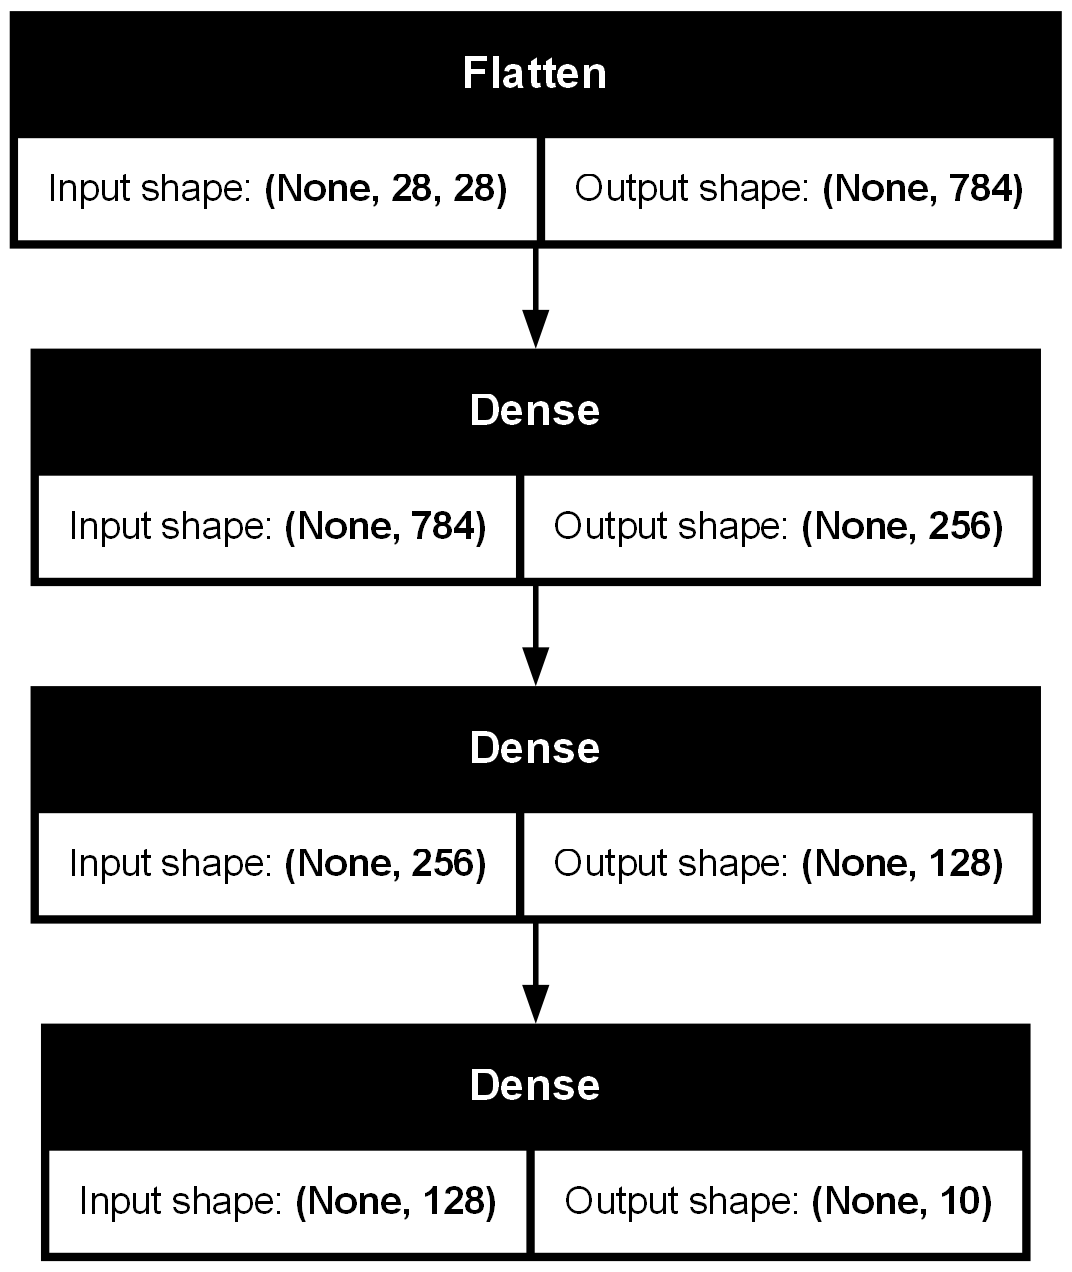

In [13]:
# Generate a plot of the model's architecture.
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

## 6. Compiling the Model
Before training, we need to configure the learning process. This is done via the `compile()` method, which specifies the loss function, the optimizer, and the metrics to monitor.

In [14]:
model.compile(loss="sparse_categorical_crossentropy", # Loss function for multi-class classification with integer labels.
              optimizer="sgd",                         # Optimizer: Stochastic Gradient Descent.
              metrics=["accuracy"])                    # Metric to monitor during training.

## 7. Training the Model
Now we're ready to train the model using the `fit()` method. We'll train for 30 epochs and pass the validation data to monitor its performance on unseen data at the end of each epoch.

In [15]:
# Train the model and store the training history.
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7637 - loss: 0.7267 - val_accuracy: 0.8132 - val_loss: 0.5278
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8303 - loss: 0.4871 - val_accuracy: 0.8524 - val_loss: 0.4433
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8452 - loss: 0.4429 - val_accuracy: 0.8586 - val_loss: 0.4162
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 0.4161 - val_accuracy: 0.8636 - val_loss: 0.3985
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8608 - loss: 0.3945 - val_accuracy: 0.8648 - val_loss: 0.3976
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8655 - loss: 0.3791 - val_accuracy: 0.8646 - val_loss: 0.3837
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8713 - loss: 0.3663 - val_accuracy: 0.8652 - val_loss: 0.3917
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3545 - 

## 8. Visualizing Training History
The `history` object returned by `fit()` contains the training metrics. We can plot the loss and accuracy for both the training and validation sets to see how the model learned over time. This is useful for diagnosing issues like overfitting.

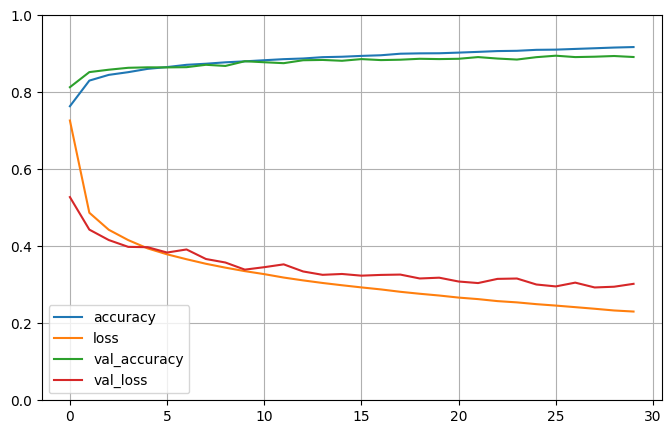

In [16]:
# Use pandas to easily plot the history DataFrame.
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the y-axis limits to [0, 1] for better visualization.
plt.show()

## 9. Evaluating the Model
Finally, we evaluate the model's performance on the test set, which it has never seen before. This gives us the final accuracy of our classifier.

In [17]:
# Evaluate the model on the test data.
# It returns the loss and accuracy.
_, acc = model.evaluate(X_test,y_test,verbose=0)

# Print the final test accuracy as a percentage.
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 88.3%
